<a href="https://colab.research.google.com/github/MartyWeissman/Brownian-Motion/blob/master/LakeMelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LakeOpen.csv to LakeOpen.csv


In [3]:
import io
lake_df = pd.read_csv(io.BytesIO(uploaded['LakeOpen.csv']))

In [4]:
lake_df.head()

,Year,Opening,Frozen,Unnamed: 3,Days frozen
0,1948,12-Apr,8-Dec,NaN,NaN
1,1949,18-Apr,25-Nov,NaN,131.0
2,1950,19-Apr,24-Nov,NaN,145.0
3,1951,18-Apr,19-Nov,NaN,145.0
4,1952,21-Apr,28-Nov,NaN,153.0


In [5]:
from google.colab import files
uploaded = files.upload()

Saving HibbingWeather.csv to HibbingWeather.csv


In [53]:
import io
hibbing_df = pd.read_csv(io.BytesIO(uploaded['HibbingWeather.csv']))

In [54]:
hibbing_df.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,US1MNSL0027,"HIBBING 2.5 W, MN US",12/30/11,NaN,0.00,0.0,NaN,NaN,NaN,NaN
1,US1MNSL0027,"HIBBING 2.5 W, MN US",1/1/12,NaN,0.01,0.0,3.0,NaN,NaN,NaN
2,US1MNSL0027,"HIBBING 2.5 W, MN US",1/2/12,NaN,0.00,0.0,NaN,NaN,NaN,NaN
3,US1MNSL0027,"HIBBING 2.5 W, MN US",1/3/12,NaN,0.00,0.0,3.0,NaN,NaN,NaN
4,US1MNSL0027,"HIBBING 2.5 W, MN US",1/4/12,NaN,0.00,0.0,3.0,NaN,NaN,NaN


In [55]:
hibbing_df.DATE = pd.to_datetime(hibbing_df.DATE)

In [56]:
hibbing_df[:5].DATE

0   2011-12-30
1   2012-01-01
2   2012-01-02
3   2012-01-03
4   2012-01-04
Name: DATE, dtype: datetime64[ns]

In [57]:
new_years = hibbing_df[(hibbing_df.DATE > pd.datetime(2025,1,1))].DATE - pd.DateOffset(years=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [58]:
new_years[:5]

3102   1945-01-01
3103   1945-01-02
3104   1945-01-03
3105   1945-01-04
3106   1945-01-05
Name: DATE, dtype: datetime64[ns]

In [62]:
hibbing_df.DATE.loc[new_years.index] = new_years

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [65]:
hibbing_df.DATE.min()

Timestamp('1945-01-01 00:00:00')

In [66]:
hibbing_df.DATE.max()

Timestamp('2021-03-01 00:00:00')

In [67]:
hibbing_df.groupby('DATE')['TMAX'].mean().dropna()

DATE
1945-01-01     7.0
1945-01-02     2.0
1945-01-03     5.0
1945-01-04    -5.0
1945-01-05    -9.0
              ... 
2021-02-25    36.5
2021-02-26    39.0
2021-02-27    39.0
2021-02-28    24.5
2021-03-01    16.5
Name: TMAX, Length: 27782, dtype: float64

In [78]:
lake_df['Win'] = pd.to_datetime(lake_df['Opening'].astype(str) + '-'+lake_df['Year'].astype(str))

In [80]:
years = lake_df.Year.unique()
years

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [113]:
lake_df.head()

,Year,Opening,Frozen,Unnamed: 3,Days frozen,Win,dayno
0,1948,12-Apr,8-Dec,NaN,NaN,1948-04-12,102.0
1,1949,18-Apr,25-Nov,NaN,131.0,1949-04-18,107.0
2,1950,19-Apr,24-Nov,NaN,145.0,1950-04-19,108.0
3,1951,18-Apr,19-Nov,NaN,145.0,1951-04-18,107.0
4,1952,21-Apr,28-Nov,NaN,153.0,1952-04-21,111.0


In [116]:
lake_df['dayno'] = lake_df['Win'] - pd.to_datetime('01-01-'+lake_df['Year'].astype(str))
lake_df['dayno'] = lake_df['dayno'].astype(int) / 86400000000000
y = pd.Series(lake_df['dayno'].astype(int).values, index=list(lake_df['Year']))
y

1948    102
1949    107
1950    108
1951    107
1952    111
       ... 
2016    104
2017     93
2018    123
2019    113
2020    101
Length: 73, dtype: int64

In [268]:
X_max = pd.DataFrame(index = y.index, columns = list(range(85)))
for year in X_max.index:
  yr_ind = [d for d in tmaxes.index if d.year == year]
  yr_ind = [d for d in yr_ind if d.month < 4]
  X_max.loc[year] = tmaxes[yr_ind][-85:].values

In [269]:
X_max.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
1948,28,26,26,15,26,34,-2,-2,4,-1,-6,6,5,19,4,-6,1,9,11,3,-4,23,24,20,17,22,16,2,16,14,13,9,-1,5,11,10,25,29,28,13,...,5,21,30,33,28,33,29,22,23,28,30,28,35,29,27,31,28,6,1,12,29,35,40,46,43,34,31,48,48,34,44,49,45,47,44,32,37,37,28,34
1949,32,36,33,15,2,9,18,30,31,33,33,15,26,10,-5,9,3,20,20,13,18,20,10,-5,11,22,17,0,13,12,18,20,17,15,9,6,26,26,3,5,...,15,21,27,30,28,23,26,25,18,19,29,32,42,38,22,42,40,23,21,25,31,28,15,18,20,20,19,25,34,32,31,35,34,35,44,43,37,39,42,42
1950,4,4,22,27,26,11,20,8,8,15,-10,-9,-11,-10,1,15,13,7,18,18,-11,-2,21,10,-2,6,12,10,28,25,32,28,26,29,29,25,20,20,24,28,...,10,20,20,19,-1,10,22,32,29,5,7,18,42,41,36,34,9,15,20,16,21,16,20,26,27,25,26,27,32,33,42,44,45,43,41,32,26,33,35,41
1951,2,7,20,33,28,25,25,26,27,24,27,28,30,16,7,2,14,19,19,5,0,-2,-6,-14,2,0,-2,10,16,16,11,18,-3,-2,2,21,21,8,8,20,...,36,39,35,30,40,38,37,20,15,18,18,20,21,31,32,12,10,20,22,28,28,29,33,33,32,35,34,25,12,19,34,29,30,35,37,42,47,44,37,31
1952,20,24,23,21,31,25,19,26,27,24,29,15,24,21,15,15,-2,-6,9,11,-4,-3,6,25,39,38,31,28,27,25,21,30,29,30,31,33,31,27,29,28,...,35,29,28,31,35,34,36,32,26,17,23,19,14,21,25,27,28,33,30,35,36,32,33,31,35,34,35,36,37,34,27,19,30,36,40,36,38,39,46,46


In [270]:
import matplotlib.pyplot as plt

In [271]:
X_max = X_max.rolling(30,axis=1).mean()
X_max = X_max.drop(columns=list(range(30)))

In [272]:
X_max = X_max[X_max.columns[-10:]]

In [273]:
X_max

,75,76,77,78,79,80,81,82,83,84
1948,30.200000,31.133333,31.633333,32.100000,32.633333,32.600000,32.866667,33.366667,33.533333,33.733333
1949,26.800000,27.266667,27.500000,27.666667,28.200000,28.866667,29.233333,29.700000,30.500000,31.266667
1950,22.966667,23.766667,24.600000,25.400000,26.800000,27.533333,27.666667,27.700000,27.900000,29.100000
1951,26.666667,26.333333,26.166667,26.333333,26.233333,26.366667,26.700000,27.500000,28.233333,28.666667
1952,29.766667,29.433333,29.500000,29.666667,29.833333,29.900000,29.966667,30.200000,30.866667,31.833333
...,...,...,...,...,...,...,...,...,...,...
2016,38.150000,38.450000,38.683333,39.050000,39.300000,39.450000,39.450000,40.416667,41.300000,42.200000
2017,30.666667,30.183333,30.083333,30.383333,31.116667,32.116667,33.333333,33.750000,34.466667,35.366667
2018,35.250000,35.750000,36.016667,36.350000,36.583333,37.166667,37.133333,36.850000,36.316667,35.700000
2019,26.933333,27.800000,28.100000,28.400000,29.016667,30.933333,31.950000,32.950000,33.183333,33.750000


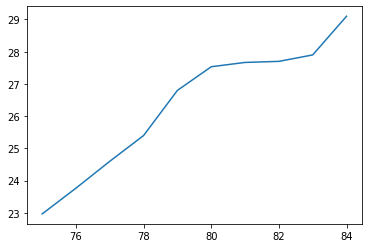

In [274]:
plt.plot(X_max.loc[1950])

In [275]:
y

1948    102
1949    107
1950    108
1951    107
1952    111
       ... 
2016    104
2017     93
2018    123
2019    113
2020    101
Length: 73, dtype: int64

In [276]:
from sklearn.linear_model import LinearRegression

In [277]:
reg = LinearRegression().fit(X_max, y)

In [278]:
reg.score(X_max, y)

0.41984677636149986

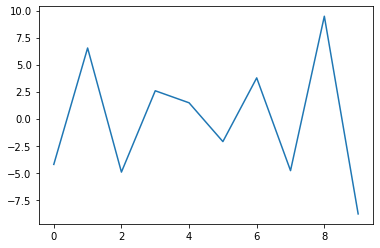

In [279]:
plt.plot(reg.coef_)

(array([1., 0., 3., 1., 0., 1., 2., 0., 1., 1.]),
 array([-8.81383538, -6.9849361 , -5.15603682, -3.32713753, -1.49823825,
         0.33066103,  2.15956031,  3.9884596 ,  5.81735888,  7.64625816,
         9.47515744]),
 <a list of 10 Patch objects>)

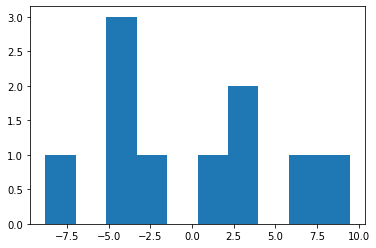

In [280]:
plt.hist(reg.coef_)

In [281]:
y.mean()

107.43835616438356

In [282]:
reg.intercept_

148.82764115794583

In [283]:
reg.coef_

array([-4.23283365,  6.53634998, -4.94360356,  2.580444  ,  1.46634488,
       -2.12204551,  3.77187293, -4.8088094 ,  9.47515744, -8.81383538])

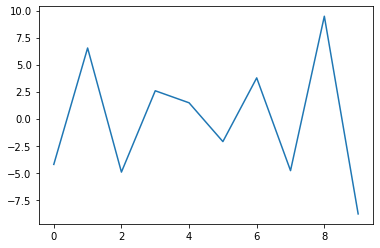

In [284]:
plt.plot(reg.coef_)

(array([ 3.,  3.,  3.,  9., 12.,  9.,  7.,  3.,  3.,  3.]),
 array([-42.80461894, -34.08688964, -25.36916035, -16.65143106,
         -7.93370176,   0.78402753,   9.50175682,  18.21948612,
         26.93721541,  35.6549447 ,  44.372674  ]),
 <a list of 10 Patch objects>)

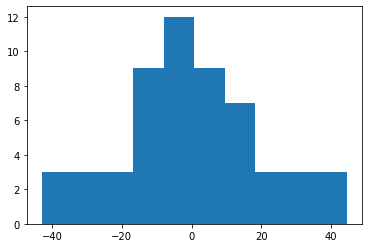

In [230]:
plt.hist(reg.coef_)